In [1]:
import sys
try:
    sys.path.remove("\\\\?\\C:\\Users\\andre\\Documents\\tracking_optimizations\\gpu-tracking")
except ValueError:
    pass
import gpu_tracking
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tifffile
import pandas as pd
import trackpy as tp

path = "../../emily_tracking/sample_vids/s_20.tif"
arr = tifffile.imread(path).astype("float32")#[None, ...]
coords = lambda df: df[["y", "x"]].to_numpy().T
from scipy.spatial import KDTree

In [33]:
diameter = 9
minmass = 0
# separation = 10
slc = slice(0, 100)
tp.quiet()
tp_df = tp.batch(arr[slc], diameter, threshold = 0, percentile = 0, minmass = minmass, characterize = False)


In [34]:
my_df = gpu_tracking.batch(arr[slc], diameter, minmass = minmass, filter_close = True, truncate_preprocessed = True)

In [35]:
it = ((my_df[my_df["frame"] == i], tp_df[tp_df["frame"] == i]) for i in range(2000))

34 34


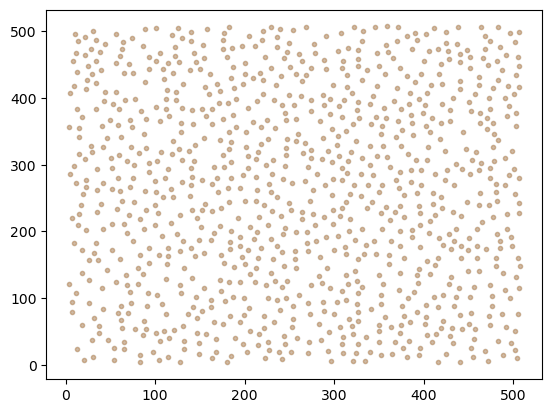

In [70]:
my_subdf, tp_subdf = next(it)
print(my_subdf["frame"].iloc[0], tp_subdf["frame"].iloc[0])
my_coords = coords(my_subdf)
tp_coords = coords(tp_subdf)
 
plt.plot(*my_coords, "C0.", alpha = 0.3)
plt.plot(*tp_coords, "C1.", alpha = 0.3)